# **Test:Hubs**

In [ ]:
# Instalar librerias
# Esta celda de código solo se ejecuta una ocasíon, ya con las liberías instaladas solo hay que importarlas.
!pip install pandas numpy matplotlib seaborn

In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matriz de importancia generada y guardada como 'hubs_network_macs_ha_cytohubba_scores.csv'

Mostrando nodos en el top 30.0% de importancia:

       node_name      MCC  DMNC   MNC  Degree   EPC  BottleNeck  EcCentricity  \
CD4        269.0  0.42151  13.0  16.0   9.181  29.0        0.25      22.91667   
CXCR4      250.0  0.45814  11.0  13.0   8.575   8.0        0.25      21.08333   
ICAM1      151.0  0.54881   7.0   8.0   7.649   4.0        0.25      18.33333   
CD80       172.0  0.42960   9.0   9.0   8.170   3.0        0.25      19.25000   
CCR7        96.0  0.41901  10.0  10.0   8.230   3.0        0.25      19.08333   
NFKB1      147.0  0.51223   7.0   8.0   7.219   2.0        0.25      18.25000   
IL1A       170.0  0.49567   8.0   8.0   7.912   2.0        0.25      18.08333   
CCL20       78.0  0.51223   7.0   7.0   7.433   1.0        0.20      17.28333   
CD38        31.0  0.51861   5.0   6.0   6.814   2.0        0.20      16.78333   
CCL22       48.0  0.58344   5.0   5.0   6.609   

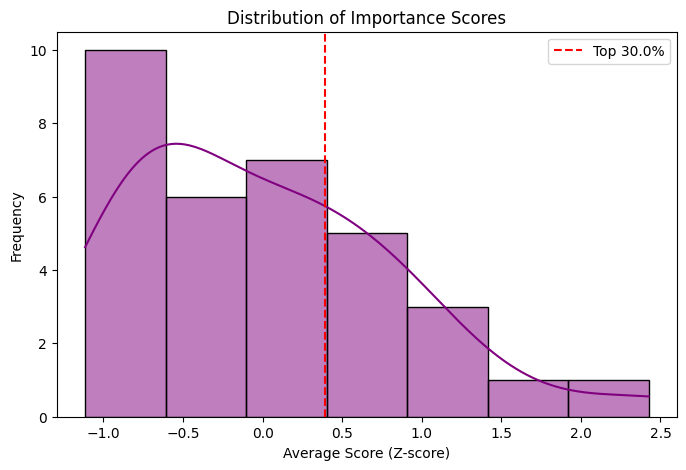

<Figure size 640x480 with 0 Axes>

Gráfico guardado como 'hubs_network_macs_ha_cytohubba_scores.png'

       node_name  Score_promedio
CD4        269.0        2.426290
CXCR4      250.0        1.574570
ICAM1      151.0        1.082428
CD80       172.0        1.010059
CCR7        96.0        0.920246
NFKB1      147.0        0.860705
IL1A       170.0        0.757748
CCL20       78.0        0.521232
CD38        31.0        0.488023
CCL22       48.0        0.418455


In [3]:
# Pedir al usuario el nombre del archivo CSV y el percentil de hubs a mostrar
archivo = input("Introduce el nombre del archivo CSV de entrada: ").strip()
percentil_usuario = float(input("Introduce el percentil de hubs a mostrar (ejemplo: 95 para top 5%): ").strip())

# Cargar el archivo
df = pd.read_csv(archivo)

# Definir métricas de centralidad
metricas = ['MCC', 'DMNC', 'MNC', 'Degree', 'EPC', 'BottleNeck', 'EcCentricity',
            'Closeness', 'Radiality', 'Betweenness', 'Stress', 'ClusteringCoefficient']

# Calcular Z-scores
for metrica in metricas:
    if metrica in df.columns:  # Verificar que la métrica exista en el archivo
        df[f'z_{metrica}'] = (df[metrica] - df[metrica].mean()) / df[metrica].std()

# Calcular el Score promedio
z_columns = [f'z_{m}' for m in metricas if f'z_{m}' in df.columns]  # Solo incluir columnas generadas
df['Score_promedio'] = df[z_columns].mean(axis=1)

# Ordenar resultados
resultado = df.sort_values(by='Score_promedio', ascending=False)

# Guardar el archivo con los scores de todos los nodos
nombre_salida = f"hubs_{archivo.replace('.csv', '')}_scores.csv"
resultado.to_csv(nombre_salida, index=True)
print(f"\nMatriz de importancia generada y guardada como '{nombre_salida}'")

# Seleccionar y mostrar hubs en el percentil definido por el usuario
percentil = resultado['Score_promedio'].quantile(percentil_usuario / 100)
hubs_destacados = resultado[resultado['Score_promedio'] >= percentil]

print(f"\nMostrando nodos en el top {100 - percentil_usuario}% de importancia:\n")
print(hubs_destacados)

# Grafico de la distribución de los hubs
plt.figure(figsize=(8,5))
sns.histplot(resultado['Score_promedio'], kde=True, color='purple')
plt.axvline(percentil, color='red', linestyle='--', label=f'Top {100 - percentil_usuario}%')
plt.xlabel('Average Score (Z-score)')
plt.ylabel('Frequency')
plt.title('Distribution of Importance Scores')
plt.legend()
plt.show()

# Guardar el gráfico en formato PNG con el mismo nombre que el CSV
nombre_grafico = nombre_salida.replace('.csv', '.png')
plt.savefig(nombre_grafico, dpi=1200, bbox_inches='tight')
plt.show()

print(f"Gráfico guardado como '{nombre_grafico}'")

# Mostrar los nodos importantes 
print()
print(hubs_destacados[['node_name', 'Score_promedio']])

In [4]:
!python --version

Python 3.11.5


In [5]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
boltons                   23.0.0
brotlipy                  0.7.0
certifi                   2024.7.4
cffi                      1.15.1
charset-normalizer        2.0.4
comm                      0.2.2
conda                     23.9.0
conda-content-trust       0.2.0
conda-libmamba-solver     23.9.1
conda-package-handling    2.2.0
conda_package_streaming   0.9.0
contourpy                 1.2.1
cryptography              41.0.3
cycler                    0.12.1
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing